<a href="https://colab.research.google.com/github/rajat1911996sharma/Machine-Learning-Model-Life-Cycle/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVM
'''
Seperating classes with in an optimal way

###Maximum Margin Hyperplane
(or can be called maximum margin classifier)

Line is searched thorough a maximum margin
the line that seperates the classes and is equidistant at the maximum distance from classes.

Note: Sum of all distances has to be maximized.

###Support Vectors
The point on classes are called supoort vectors because these points,the vectors,
are supporting the whole algorithm.

These points are the closest to each other but in different classes 
These are the support vectors.(like an endpoint of two classes)

###Positive and Negative Hyperplane
The hyperplane above the maximum margin hyperplane is Positive Hyperplane.(or in 2D space it is right side of the maximum margin hyperplane)
While the Hyperplane below maximum margin hyperplane is Negative Hyperplane.(or in 2D space it is left side of the maximum margin hyperplane)

##Why are SVM so popular ?
Imagine you trying to teach a machine how to identify an apple or an orange. You will give them test dataset to analyse what parameters they have.

Now, we will try to predict whether the image is apple or orange.

Most ML algorithms will classify most apple-looking to apples and most orange-looking to oranges.

It is a bit different for SVMs. They look at the most stock looking apples and oranges and pick out the most orange-looking apple and most apple-looking orange and make them the support vectors as they will be very close to the hyperplane boundary.

It is a very extreme type of algorithm in that way.
This is what makes it special.

'''

#Data Preprocessing

##Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Importing Dataset

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#Splitting the Dataset into Training and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

#Training the SVM model on Training Set

In [9]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#Predicting new results

In [12]:
svc.predict(sc.transform([[30,87000]]))

array([0])

#Predicting the Test Set Results

In [13]:
test_pred = svc.predict(X_test)

#Evaluating the predictions

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
print(classification_report(y_test,test_pred))
print('\n')
print(confusion_matrix(y_test,test_pred))
print('\n')
print(accuracy_score(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



[[55  3]
 [ 1 21]]


0.95


#Visualization of Training Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


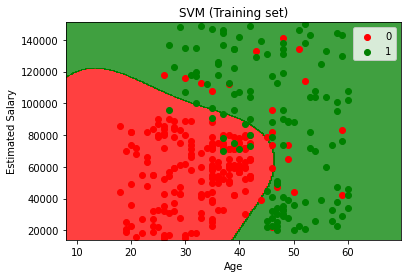

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, svc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()


#Visualization of Test Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


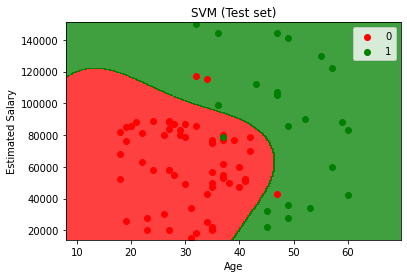

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, svc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
